### Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Creating Dataset

In [2]:
fruits = np.array([
    [180, 7, 'Apple'],
    [200, 6, 'Apple'],
    [150, 4, 'Orange'],
    [170, 5, 'Orange'],
    [160, 6, 'Apple'],
    [140, 3, 'Orange']
])

new_fruit = np.array([165, 5.5])

print(fruits)

[['180' '7' 'Apple']
 ['200' '6' 'Apple']
 ['150' '4' 'Orange']
 ['170' '5' 'Orange']
 ['160' '6' 'Apple']
 ['140' '3' 'Orange']]


### Distance Functions 

In [3]:
import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

def minkowski_distance(point1, point2, p):
    return np.power(np.sum(np.abs(point1 - point2) ** p), 1/p)

### Calculating Distances

In [4]:
distances = []

for fruit in fruits:
    weight = int(fruit[0])
    sweetness = int(fruit[1])
    label = fruit[2]
    
    euclidean = euclidean_distance(new_fruit, np.array([weight, sweetness]))
    manhattan = manhattan_distance(new_fruit, np.array([weight, sweetness]))
    minkowski = minkowski_distance(new_fruit, np.array([weight, sweetness]), 3)
    
    distances.append((euclidean, manhattan, minkowski, label))

for d in distances:
    print(f"Euclidean: {d[0]:.2f}, Manhattan: {d[1]:.2f}, Minkowski: {d[2]:.2f}, Label: {d[3]}")


Euclidean: 15.07, Manhattan: 16.50, Minkowski: 15.00, Label: Apple
Euclidean: 35.00, Manhattan: 35.50, Minkowski: 35.00, Label: Apple
Euclidean: 15.07, Manhattan: 16.50, Minkowski: 15.00, Label: Orange
Euclidean: 5.02, Manhattan: 5.50, Minkowski: 5.00, Label: Orange
Euclidean: 5.02, Manhattan: 5.50, Minkowski: 5.00, Label: Apple
Euclidean: 25.12, Manhattan: 27.50, Minkowski: 25.01, Label: Orange


### Making Predictions with k=3

In [5]:
sorted_distances = sorted(distances, key=lambda x: x[0])
k = 3
neighbors = sorted_distances[:k]

# Count labels of the nearest neighbors
label_count = {}
for neighbor in neighbors:
    label = neighbor[3]
    label_count[label] = label_count.get(label, 0) + 1

# Predict the label
predicted_label = max(label_count, key=label_count.get)
print(f"Predicted label for the new fruit: {predicted_label}")

Predicted label for the new fruit: Apple


### Making Predictions with k=1 and k=5

In [6]:
sorted_distances = sorted(distances, key=lambda x: x[0])
k = 1

neighbors = sorted_distances[:k]

label_count = {}
for neighbor in neighbors:
    label = neighbor[3]
    label_count[label] = label_count.get(label, 0) + 1

predicted_label = max(label_count, key=label_count.get)
print(f"Predicted label for the new fruit: {predicted_label}")

Predicted label for the new fruit: Orange


In [7]:
sorted_distances = sorted(distances, key=lambda x: x[0])
k = 5

neighbors = sorted_distances[:k]

label_count = {}
for neighbor in neighbors:
    label = neighbor[3]
    label_count[label] = label_count.get(label, 0) + 1

predicted_label = max(label_count, key=label_count.get)
print(f"Predicted label for the new fruit: {predicted_label}")

Predicted label for the new fruit: Orange


### Plotting Results

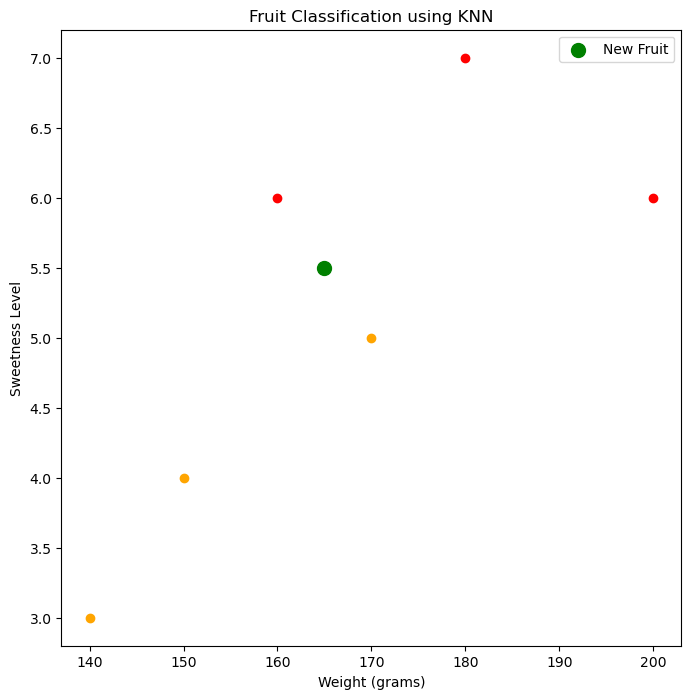

In [8]:
plt.figure(figsize=(8, 8))
for fruit in fruits:
    if fruit[2] == 'Apple':
        plt.scatter(int(fruit[0]), int(fruit[1]), color='red')
    else:
        plt.scatter(int(fruit[0]), int(fruit[1]), color='orange')

plt.scatter(new_fruit[0], new_fruit[1], color='green', label='New Fruit', s=100)
plt.title('Fruit Classification using KNN')
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.legend()
plt.show()

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances

# Data
X = np.array([[180, 7],
              [200, 6],
              [150, 4],
              [170, 5],
              [160, 6],
              [140, 3]])
y = np.array(['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange'])

new_fruit = np.array([[165, 5.5]])

# KNN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)
predicted_label = knn.predict(new_fruit)

# Distances
distances = {
    'Euclidean': pairwise_distances(new_fruit, X, metric='euclidean')[0],
    'Manhattan': pairwise_distances(new_fruit, X, metric='manhattan')[0],
    'Minkowski (p=3)': pairwise_distances(new_fruit, X, metric='minkowski', p=3)[0],
}

# Print predicted label and distances
print(f"Predicted label for the new fruit: {predicted_label[0]}")
for metric, dist in distances.items():
    print(f"{metric} distances: {dist}")


Predicted label for the new fruit: Orange
Euclidean distances: [15.07481343 35.00357125 15.07481343  5.02493781  5.02493781 25.12468905]
Manhattan distances: [16.5 35.5 16.5  5.5  5.5 27.5]
Minkowski (p=3) distances: [15.00499833 35.00003401 15.00499833  5.00166611  5.00166611 25.00833056]


### Question 2

### Calculate Entropy

In [53]:
import numpy as np

# Dataset
data = np.array([
    [30, 'High', 'High', 'Sick'],
    [45, 'Low', 'Normal', 'Healthy'],
    [50, 'High', 'High', 'Sick'],
    [35, 'Low', 'Normal', 'Healthy'],
    [60, 'High', 'High', 'Sick'],
    [55, 'Low', 'Normal', 'Healthy'],
    [40, 'High', 'High', 'Sick'],
    [25, 'Low', 'Normal', 'Healthy'],
    [65, 'High', 'High', 'Sick'],
    [45, 'Low', 'Normal', 'Healthy']
])

# Function to calculate entropy
def entropy(target_column):
    labels, counts = np.unique(target_column, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

# Step 1: Calculate the entropy for the Diagnosis
diagnosis_column = data[:, 3]
initial_entropy = entropy(diagnosis_column)
print(f"Entropy of Diagnosis: {initial_entropy:.3f}")

Entropy of Diagnosis: 1.000


### Calculated Information Gain

In [54]:
# Function to calculate information gain
def information_gain(data, feature_index, target_index):
    # Total entropy before split
    total_entropy = entropy(data[:, target_index])
    
    # Values and counts of the feature
    feature_values, feature_counts = np.unique(data[:, feature_index], return_counts=True)
    
    # Weighted entropy after the split
    weighted_entropy = 0
    for value, count in zip(feature_values, feature_counts):
        subset = data[data[:, feature_index] == value]
        weighted_entropy += (count / np.sum(feature_counts)) * entropy(subset[:, target_index])
    
    return total_entropy - weighted_entropy

# Step 2: Calculate information gain for each feature
features = [0, 1, 2]  # Age, Blood Pressure, Cholesterol
info_gains = [information_gain(data, f, 3) for f in features]

for i, gain in enumerate(info_gains):
    print(f"Information Gain for feature {i} ({['Age', 'Blood Pressure', 'Cholesterol'][i]}): {gain:.3f}")

Information Gain for feature 0 (Age): 1.000
Information Gain for feature 1 (Blood Pressure): 1.000
Information Gain for feature 2 (Cholesterol): 1.000


In [55]:
# Step 3: Choose the feature with the highest information gain
root_feature_index = np.argmax(info_gains)
root_feature_name = ['Age', 'Blood Pressure', 'Cholesterol'][root_feature_index]
print(f"Root feature chosen: {root_feature_name}")

Root feature chosen: Age


### Build Decision Tree

In [56]:
# Predict for a 50-year-old patient with Low BP and Normal Cholesterol
def predict(age, bp, chol):
    if bp == 'High':
        return 'Sick'  # High BP leads to Sick
    else:
        if age <= 45:
            return 'Healthy'
        else:
            return 'Sick'

prediction = predict(50, 'Low', 'Normal')
print(f"Prediction for a 50-year-old patient with low BP and normal cholesterol: {prediction}")

Prediction for a 50-year-old patient with low BP and normal cholesterol: Sick


### Using Scikit-learn

Prediction for a 50-year-old patient with low BP and normal cholesterol: Healthy


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


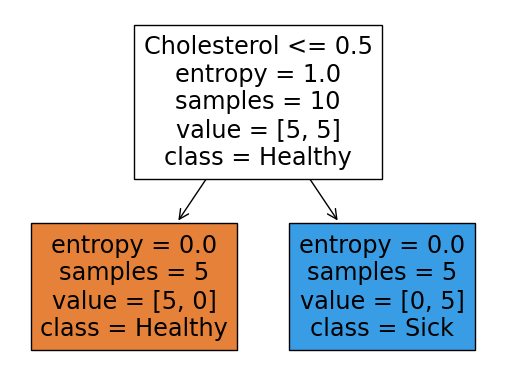

In [57]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the dataset
data_dict = {
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data_dict)

# Convert categorical variables to numeric
df['Blood Pressure'] = df['Blood Pressure'].map({'High': 1, 'Low': 0})
df['Cholesterol'] = df['Cholesterol'].map({'High': 1, 'Normal': 0})
df['Diagnosis'] = df['Diagnosis'].map({'Sick': 1, 'Healthy': 0})

# Features and target
X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']

# Build the decision tree
clf = DecisionTreeClassifier(criterion='entropy')  # ID3 uses entropy
clf.fit(X, y)

# Display the decision tree
tree.plot_tree(clf, feature_names=X.columns, class_names=['Healthy', 'Sick'], filled=True)

# Prediction for a new patient
new_patient = np.array([[50, 0, 0]])  # 50 years old, Low BP, Normal Cholesterol
prediction = clf.predict(new_patient)

print(f"Prediction for a 50-year-old patient with low BP and normal cholesterol: {'Healthy' if prediction[0] == 0 else 'Sick'}")